In [1]:
import pandas_datareader as pdr


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime #for timeseries data

In [2]:
df_tesla= pdr.get_data_yahoo('TSLA') 

In [3]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-26,62.900002,61.799999,62.473999,62.034000,23475000.0,62.034000
2017-04-27,62.618000,61.500000,62.338001,61.726002,17343000.0,61.726002
2017-04-28,62.959999,61.599998,61.966000,62.813999,22527500.0,62.813999
2017-05-01,65.449997,62.962002,62.976002,64.566002,44148000.0,64.566002
2017-05-02,65.531998,63.312000,64.800003,63.778000,26914000.0,63.778000


In [4]:
df_tesla.shape

(1260, 6)

## 1. Simple Moving Average

- Suppose I have list of numbers. window size is 5.(n)
- while calculating SMA, fisrt 4 (n-1) entries will be NA. 
- ex: in below pic, n=3

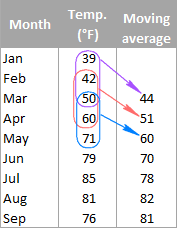


### Advantages
-  it offers a smoothed <b> "Curve" </b>
- less prone to whipsawing up and down in response to slight, temporary price swings back and forth. 

### Disadvantage
- The SMA's weakness is that it is slower to respond to rapid price changes that often occur at market reversal points.
- In timeseries, we generally have to prioritize most recent data ( provide more weight) to make forecasting.
- In SMA, we will prioritize all the data based on window size.


### rolling( )

<AxesSubplot:xlabel='Date'>

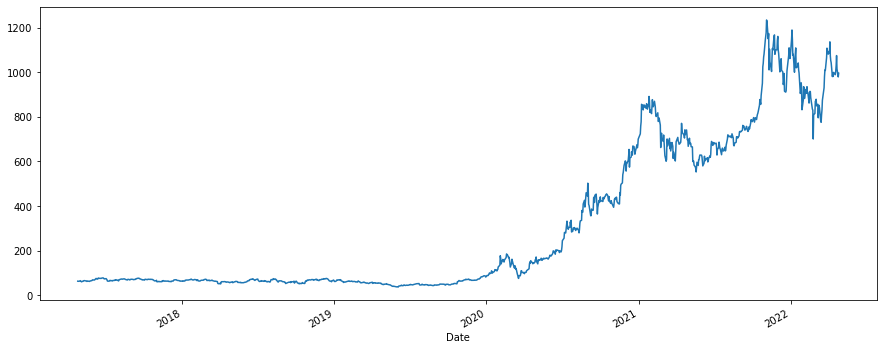

In [6]:
df_tesla['Open'].plot(figsize=(15,6))

In [9]:
# for SMA, 

df_tesla["Open: 10 days rolling"]= df_tesla["Open"].rolling(window=5, min_periods=2).mean()
#if period= 1, if my window size is 5, then the SMA for 1st 4 will be NaN. 
#if I consider period=1, only 1st entry of SMA will be NaN, res 3 will be the same number as it is 
#If I give periods more than window, even then all 10 entries will be NaN

In [10]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Open: 10 days rolling
Date,,,,,,,
2017-04-26,62.900002,61.799999,62.473999,62.034000,23475000.0,62.034000,NaN
2017-04-27,62.618000,61.500000,62.338001,61.726002,17343000.0,61.726002,62.406000
2017-04-28,62.959999,61.599998,61.966000,62.813999,22527500.0,62.813999,62.259333
2017-05-01,65.449997,62.962002,62.976002,64.566002,44148000.0,64.566002,62.438500
2017-05-02,65.531998,63.312000,64.800003,63.778000,26914000.0,63.778000,62.910801


<AxesSubplot:xlabel='Date'>

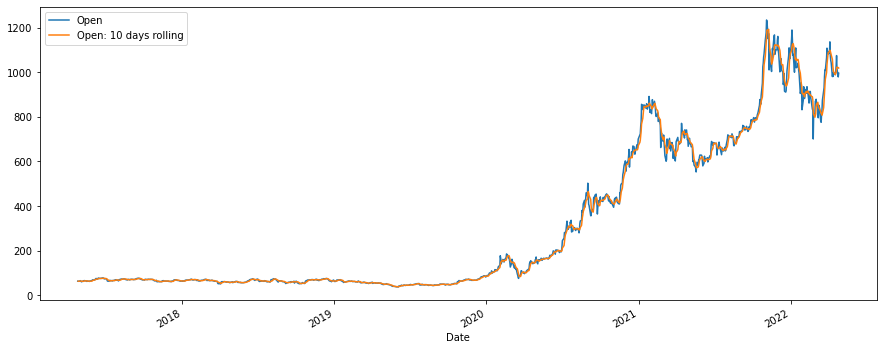

In [12]:
df_tesla[["Open","Open: 10 days rolling"]].plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

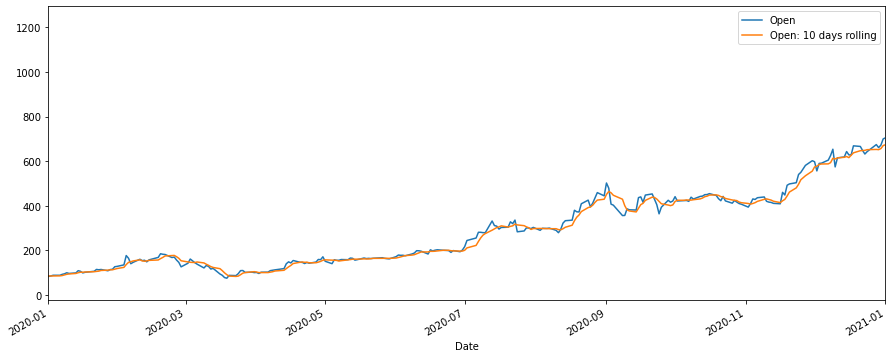

In [14]:
df_tesla[["Open","Open: 10 days rolling"]].plot(xlim= ['2020-01-01','2021-01-01'],figsize=(15,6))

# here in the smoothened curve, we can actually suggest to either "Buy" or "Sell" stocks. 
# Note: this is for the small term only.

In [15]:
#checking different rolling windows 
df_tesla["Open: 30 days rolling"]= df_tesla["Open"].rolling(window=30, min_periods=2).mean()
df_tesla["Open: 50 days rolling"]= df_tesla["Open"].rolling(window=50, min_periods=2).mean()

<AxesSubplot:xlabel='Date'>

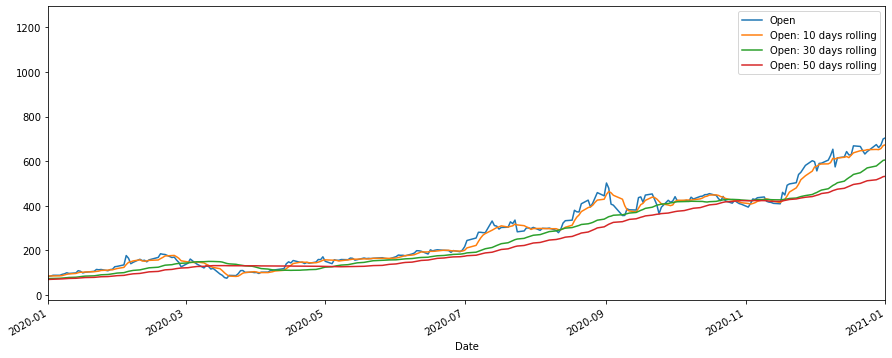

In [16]:
df_tesla[["Open","Open: 10 days rolling","Open: 30 days rolling","Open: 50 days rolling" ]].plot(xlim= ['2020-01-01','2021-01-01'],figsize=(15,6))

## 2. Cumulative moving average

- The Cumulative Moving Average is the unweighted mean of the previous values up to the current time t. 
- The simple moving average has a sliding window of constant size M. 
- On the contrary, the window size becomes larger as the time passes when computing the cumulative moving average.

- 12
- 13 --> 12+13 /2 = 12.5
- 14 --> (12+13+14)/3= 12
- 15 --> (12+13+14+15)/4
- 11

That is window size will be increased as we move

#### expanding( )

<AxesSubplot:xlabel='Date'>

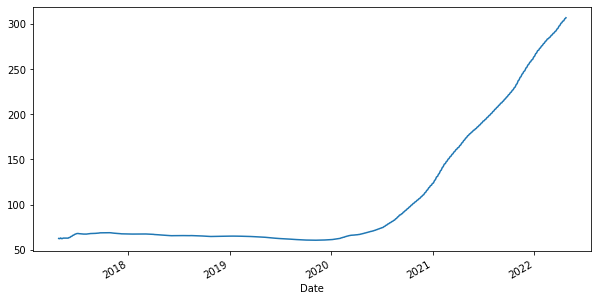

In [17]:
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

#no need to provide window size

## 3. Exponential  Moving Average EMA

- EMA is a type of moving average (MA) that places a greater weight and significance on the most recent data points.
- As we have to focus more in recent data. We are considering the closing stock and multiplyng that with multiplier which gives much weightage to it. Also we are considering prev EMA and boosting the importance of the recent data.
-
- calculation: the sum of all closing prices of a stock during a specific timeframe has to be divided by the total number of observations in that given period.
- <b>(('Close'- Prev EMA)* Multiplier ) + Prev EMA</b>
- 
- For window size 10, and to calulate EMA for 10th, we need to have previous EMA. 
- In the first calculation, we do not have previous one so for the first one we calculate SMA. Consider that as prev EMA to calulate the first one. 
- For the 2nd calculation, we will use previous calculation of EMA.
- Multiplier--> (2/10+1) where 10 is rolling window size. 
- we are here using the exponential method to smoothen. 

#### ewm( )

In [19]:
df_tesla["EMA_0.1"]= df_tesla["Open"].ewm(alpha= 0.1, adjust = False).mean()

<AxesSubplot:xlabel='Date'>

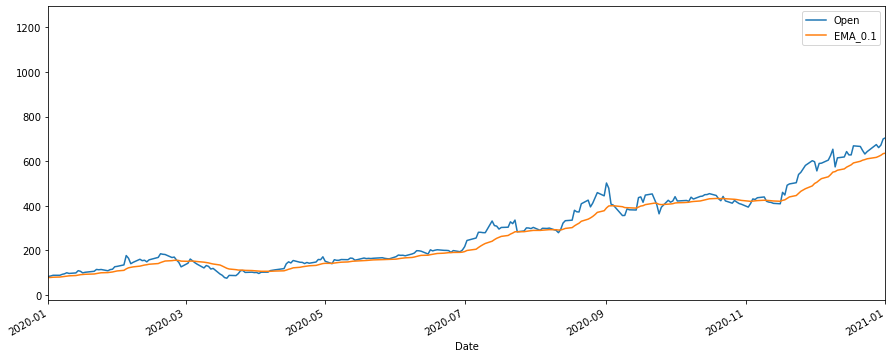

In [20]:
df_tesla[["Open","EMA_0.1"]].plot(xlim= ['2020-01-01','2021-01-01'],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

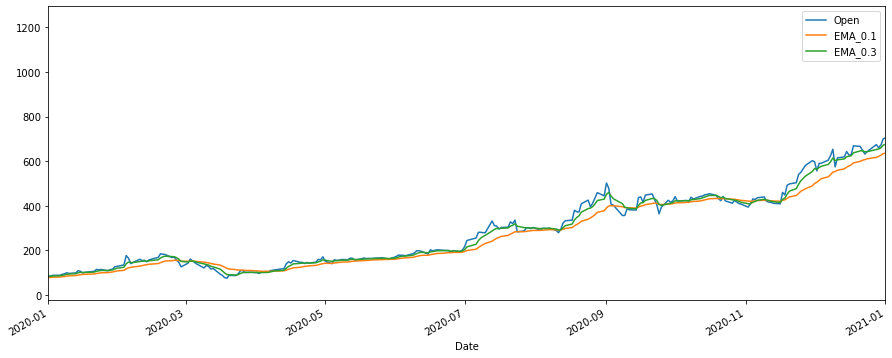

In [22]:
# to smoothen more, we can set alpha vaalue to 0.3
df_tesla["EMA_0.3"]= df_tesla["Open"].ewm(alpha= 0.3, adjust = False).mean()
df_tesla[["Open","EMA_0.1","EMA_0.3"]].plot(xlim= ['2020-01-01','2021-01-01'],figsize=(15,6))

## 4. Exponential Weighted Moving Average EWMA

- <b> EMWA(t) = a *x(t) + (1-a) EMWA(t-1) </b>
- where, a-> weight x(t) is the 1st data 
- here, I am prioritizing the first data instead of previous one. This prevents any kind of lags. 

#### ewm( ) using argument span. There is no direct function to compute ewma

In [28]:
df_tesla["EMA_5Days"]= df_tesla["Open"].ewm(span= 5).mean()

#span here is like multiplier. alpha= 2/(span+1)

<AxesSubplot:xlabel='Date'>

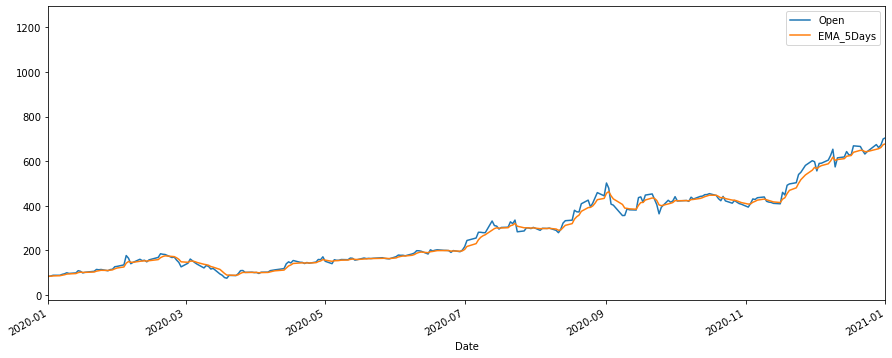

In [26]:
df_tesla[["Open","EMA_5Days"]].plot(xlim= ['2020-01-01','2021-01-01'],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

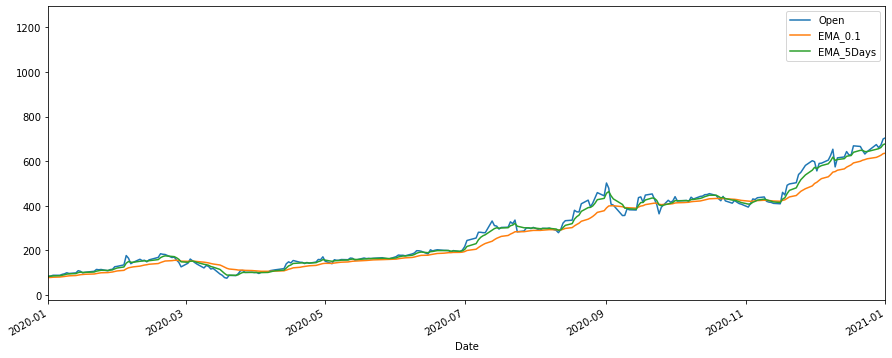

In [27]:
df_tesla[["Open","EMA_0.1","EMA_5Days"]].plot(xlim= ['2020-01-01','2021-01-01'],figsize=(15,6))

### Which is best among 4? Exponential Weighted Moving Average

## ARIMA

#### AR-MA

- This model is good for forecasting Sales. But not for stocks
- AR: Auto Regressor
- MA: Moving average 

#### 1. Moving average
- 


- AR-I-MA
- AR: Auto Regressor
- I:
- MA: Moving average 





### (interview) 

- PACF, ACF
- Which is used for moving average and auo regression. 
